<a href="https://colab.research.google.com/github/betaSolver05609/LeetCode/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install torch
# !pip install torchvision
# !pip install gym
# !pip install box2d-py

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

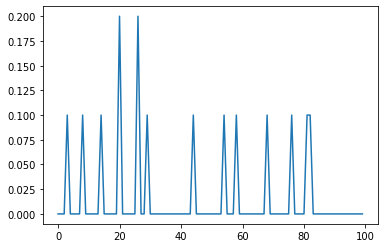

In [16]:
#Randomly chosing

env=gym.make('FrozenLake-v0')
n_games = 1000
win_pct=[]
scores=[]

for i in range(n_games):
  done=False
  obs=env.reset();
  score=0;
  while not done:
    action=env.action_space.sample();
    obs, reward, done, info=env.step(action)
    score+=reward
  scores.append(score)

  if i%10==0:
    average=np.mean(scores[-10:])
    win_pct.append(average)

plt.plot(win_pct)
plt.show()


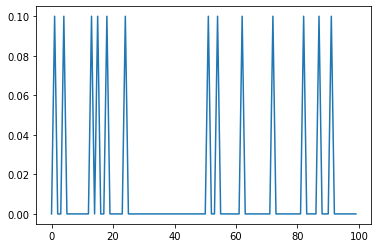

In [22]:
#Doing it with defined policy. Policy is a mapping between states and corresponding action

env=gym.make('FrozenLake-v0')
num_games = 1000
win_pct=[]
scores=[]
#policy is a mapping of state to action
policy={0:1, 1:2, 2:3, 3:1, 4:2, 5:1, 6: 3, 7:3, 8:1, 9:3, 11:1, 12: 0, 13:3, 14:2, 15:3, 10:1}

#Left=0 down=1 up=2 right=3

for i in range (num_games):
  done = False;
  env.reset();
  score = 0;
  while not done:
    action=policy[obs]
    obs, reward, done, info=env.step(action)
    score+=reward
  scores.append(score)

  if i%10==0:
    average=np.mean(scores[-10:])
    win_pct.append(average)
  
plt.plot(win_pct)
plt.show();



In [34]:
#implementing Q learning algorithm

class Agent:
  def __init__ (self, alpha, gamma, n_actions, n_states, eps_start, eps_end, eps_dec):
    self.alpha=alpha
    self.gamma=gamma
    self.n_actions=n_actions
    self.n_states = n_states
    self.epsilon = eps_start
    self.eps_min=eps_end
    self.eps_dec=eps_dec

    self.Q={}
    self.initQ();

  def initQ(self):
    for state in range(self.n_states):
      for action in range(self.n_actions):
        self.Q[(state, action)]=0.0
    print(self.Q)
  
  def choose_action(self, state):
    if np.random.random() < self.epsilon:
      action  = np.random.choice([i for i in range(self.n_actions)])
    else: 
      actions = np.array([self.Q[(state, a)] for a in range(self.n_actions)])
      action=np.argmax(actions)
    return action
  
  def decrement_epsilon(self):
    self.epsilon=self.epsilon*self.eps_dec if self.epsilon>self.eps_min else self.eps_min
    return self.epsilon
  
  def learn(self, state, action, reward, state_):
    actions=np.array(self.Q[(state, a)] for a in range(self.n_actions))
    a_max=np.argmax(actions)
    self.Q[(state, action)]+=self.alpha*(reward+self.gamma*self.Q[(state, a_max)]-self.Q[(state, action)])
    self.decrement_epsilon();

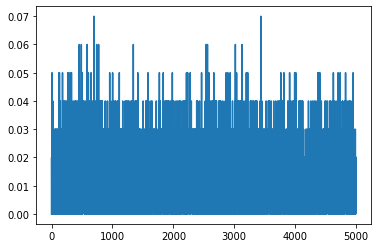

In [37]:
env=gym.make('FrozenLake-v0')
agent=Agent(alpha=0.001, gamma=0.9, n_actions=4, n_states=16, eps_start=1.0, eps_end=0.01, eps_dec=0.99999995)

scores=[]
win_pct=[]
n_games=500000

for i in range(n_games):
  done=False;
  obs=env.reset();
  score=0;
  while not done:
    action=agent.choose_action(obs)
    obs_, reward, done, info=env.step(action)
    agent.learn(obs, action, reward, obs_)
    score+=reward
    obs=obs_
  scores.append(score)

  if i%100==0:
    average=np.mean(scores[-100:])
    win_pct.append(average)
    # if i%1000==0:
    #   print('episode', i, 'win_pct %.2f' % average, 'epsilon %.2f' %agent.epsilon)

plt.plot(win_pct)
plt.show()

